# Moving meshes

For this project I used 

[1] Huang, W. and Russell, R.D., 2010. Adaptive moving mesh methods (Vol. 174). Springer Science & Business Media.
Vancouve

## Literature review 
Broad reviews of adaptive mesh methods can be found in the books of Thompson <cite data-cite = "thompson_handbook_1998"></cite>, Liseikin \cite{liseikin_grid_2009} and Huang and Russel \cite{huang_adaptive_2011}.
There are two main types of adaptive techniques: the h-methods, which refine and coarsen the mesh locally, 
and the r-methods, which move the element vertices to concentrate them in the desired regions. 
In local adaptive mesh refinement methods (h-methods) \cite{adjerid_high-order_1992,eriksson_adaptive_1991,babuska_p-and_1990} nodes are added or removed at fixed time steps 
so that the solution is resolved to a prescribed accuracy. The coordinate transformation, or moving mesh approach (r-methods)\cite{huang_adaptive_2011}, is mainly used to dynamically adapt a mesh to a solution by concentrating mesh nodes in regions of large gradients. This approach was successfully applied for a wide range of problems in computational fluid dynamics  \cite{baker_mesh_1997,breslavskii_dynamic_2008,yanenko_methods_1976}.
Moving mesh methods may further be subdivided into variational methods and partial differential equation based methods.

In the variational approach, a coordinate transformation is determined as a minimizer of a certain meshing functional. 
Different types of meshing functionals have been developed.
Winslow \cite{winslow_adaptive-mesh_1981} suggested an equipotential method based on variable diffusion. 
The variational method of Brackbill and Saltzman \cite{brackbill_adaptive_1982} involves the minimization of a functional 
based on mesh concentration, smoothness, and orthogonality. 
Dvinsky \cite{dvinsky_adaptive_1991} proposed the meshing functional based on the energy of harmonic mappings, while Knupp \cite{knupp_jacobian-weighted_1996} and Knupp and Robidoux \cite{knupp_framework_2000} used the idea of conditioning the Jacobian matrix of the coordinate transformation.
Huang \cite{huang_variational_2001} minimized a functional based on equidistribution conditions. 
The most recent comparison of meshing functionals were presented in \cite{huang_comparative_2015}. 

In methods based on moving mesh partial differential equations (MMPDE) \cite{huang_moving_1994}, 
the mesh equation and the original differential equation are often solved simultaneously. In \cite{huang_moving_1998,huang_analysis_1997,huang_high_1998} MMPDEs are formulated from the gradient flow equation for two-dimensional case. 
Practical aspects of formulation and solution of MMPDEs are considered in \cite{huang_practical_2001,budd_adaptivity_2009}.

In both variational and MMPDEs methods a vector or a scalar monitoring function (or functions) guides the position of the mesh nodes. 
The monitoring function is usually designed to measure the solution error and equidistribute it amongst mesh elements \cite{cao_study_1999}.

Another approach to mesh adaptation was proposed by Tukovic and Jasak \cite{jasak_automatic_2006, tukovic_moving_2012} and implemented in open source library OpenFOAM \cite{jasak_dynamic_2010}. In this method the mesh node's displacement is governed by the Laplace equation with variable diffusivity (monitoring function). The authors demonstrated successful application of this method in numerical analyses of fundamental multiphase flows. 

## Toy problem

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

We consider basic principles of adaptivity and moving mesh methods for solving partial differential equations in one spatial dimension. In particular, a simple model problem – an initial-boundary value problem consisting of Burgers’ equation
$$u_t=\varepsilon u_{xx}− \left(\frac{u}{2}\right)^2_x, \quad x\in(0,1),\ t>0$$
with boundary conditions
$$u(0,t) = u(1,t) = 0$$
and initial condition
$$u(x, 0) = \sin(2\pi x) + \frac{1}{2}\sin(\pi x).$$

First consider a standard numerical method, method of lines. In this method the PDE is first discretized in the spatial domain, and then the resulting system of ordinary differential equations (ODEs) is integrated using an ODE solver. This method separates the spatial and temporal components of the PDE, so that attention can be focused on each of them in turn.

In [199]:
def burgers_fd(eps, n, sg):
    X = np.linspace(0,1,n)
    h = 1./(n-1)
    tau = 0.01*h
    n_t = int(1/tau) + 1
    T = np.linspace(0,1,n_t)
    print("Number of space steps = " + str(n))
    print("Space step = " + str(h))
    print("Time step = " + str(tau))
    print("Number of time steps = " + str(n_t))
    U = []
    U_new = np.zeros(n)
    print('working ...')
    # Initial condition
    for i in range(n):
        U.append(np.sin(2*np.pi*X[i])+0.5*np.sin(np.pi*X[i]))
    plt.plot(X,U,sg,label = "t = 0.0")
    # Boundary conditions
    U[0] = 0
    U[n-1] = 0
    
    for j in range(1,n_t):
        for i in range(1,n-1):
            U_new[i] = U[i] + tau*(eps*(U[i+1]-2*U[i]+U[i-1])/h**2 - (U[i+1]**2-U[i-1]**2)/4/h)
        U = U_new
        if T[j] in (0.0,0.2,0.4,0.6,0.8,1):
            label = 't = ' + str(T[j])   
            plt.plot(X,U_new,sg, label = label)
    
    print('done')
    plt.xlabel("x")
    plt.ylabel("U(x)")
    plt.title("N = {}, eps = {}".format(n,eps))
    plt.grid(True)
    plt.legend(loc=0)
    plt.show();

For a small $\varepsilon$ a finer mesh has to be used to resolve the steep front. These examples illustrate that even for 2001 mesh points the occilation is still visible for the case of $\varepsilon = 10^{−4}$. 

Number of space steps = 41
Space step = 0.025
Time step = 0.00025
Number of time steps = 4001
working ...
done


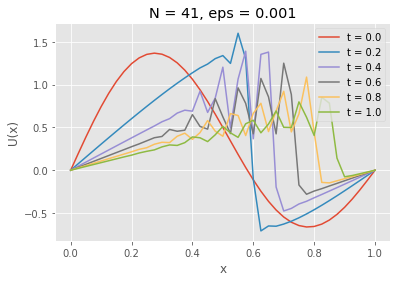

In [200]:
n = 41
eps = 0.001
sg = '-'
burgers_fd(eps, n, sg)

Number of space steps = 81
Space step = 0.0125
Time step = 0.000125
Number of time steps = 8001
working ...
done


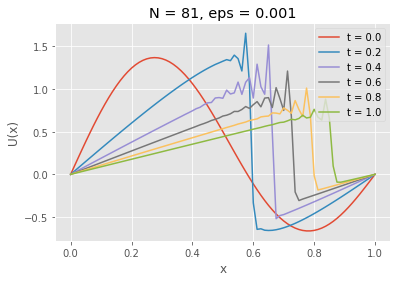

In [201]:
n = 81
eps = 0.001
sg = '-'
burgers_fd(eps, n, sg)

Number of space steps = 501
Space step = 0.002
Time step = 2e-05
Number of time steps = 50000
working ...
done


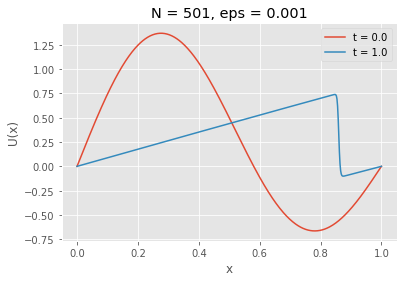

In [202]:
n = 501
eps = 0.001
sg = '-'
burgers_fd(eps, n, sg)

Number of space steps = 2001
Space step = 0.0005
Time step = 5e-06
Number of time steps = 200000
working ...


KeyboardInterrupt: 

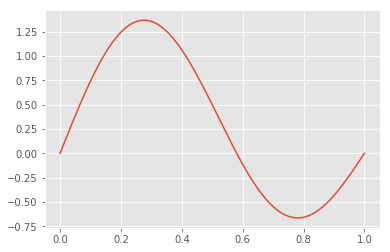

In [203]:
n = 2001
eps = 0.0001
sg = '-'
burgers_fd(eps, n, sg)

To make the mesh finer became computationally expansive, especially for 2D and 3D cases. Therefore, an adaptive mesh can be a good technique for solving such problems with steep gradients.

We can see that for $\varepsilon = 10^{-3}$, a physical result is obtained only when more than 500 mesh points are used. For $\varepsilon = 10^{-4}$, even 2001 points is not enough.

## Moving Mesh Method
### Differential equation
Adaptive moving mesh methods were thoroughly investigated by Huand and Russel in \cite{huang_adaptive_2011}. 
The basic idea of these methods is to construct a one-to-one mapping between the physical $\Omega$ and computational $\Omega_c$ domains.
$$\Omega:\  x_0=a<x_1<\dots<x_N = b $$
$$\Omega_c:\ \xi_0=0<\xi_1<\dots<\xi_N = 1,\quad \text{where}\quad \xi_j = \frac{(j-1)}{(N-1)}$$

A finite difference discretization of Burgers’ equation for $uˆ(\xi,t)$ on this moving mesh is
$$\frac{d U_j}{dt}-\frac{(U_{j+1} - U_{j-1})}{(x_{j+1} - x_{j-1})}\frac{dx_j}{dt} = 
\frac{2\varepsilon}{x_{j+1}-x_j-1}\left[\frac{U_{j+1}-U_{j}}{x_{j+1}-x_{j}} - 
\frac{U_{j}-U_{j-1}}{x_{j}-x_{j-1}}\right] - \frac{1}{2}\frac{U^2_{j+1} - U^2_{j-1}}{x_{j+1}-x_{j-1}}. $$

Our goal is to find a mesh $x_1 = a<x_2<\dots<x_N=b$, which evenly distributes the mesh density function $\rho(x) > 0$ amongst the subintervals:
$$\int_{x_1}^{x_2}\rho(x)dx = \cdots = \int_{x_{N-1}}^{x_N}\rho(x)dx$$
$$\int_{a}^{x(\xi)}\rho(x)dx = \xi \int_{a}^{b}\rho(x)dx$$

Differentiating the last equation with respect to $\xi$, one sees that $x(\xi)$ satisfies the quasi-linear second-order differential equation
$$\frac{d}{d\xi}\left(\rho(x)\frac{dx}{d\xi} \right) = 0, \quad x(0)=a, \ x(1) = b.	$$
This equation can be modified to become a parabolic equation for a continuously moving mesh, moving mesh PDE (MMPDE) \cite{huang_practical_2001}: 
$$\frac{\partial x}{\partial t} = \frac{1}{\tau \rho}\frac{\partial}{\partial \xi}\left(\rho(x)\frac{\partial x}{\partial \xi} \right),$$
where $\tau>0$ is a user defined parameter for adjusting the time scale of the mesh equation. 
To calculate the new node position we solve the last equation with variable coefficient $\rho(x)$. 

Numerical discretizations of these equations are given by
$$\frac{dx_j}{dt} = \frac{1}{\rho_j \tau \Delta\xi^2} \left[\frac{\rho_{j+1}+\rho_j}{2}(x_{j+1}-x_{j}) - \frac{\rho_{j}+\rho_{j-1}}{2}(x_{j}-x_{j-1})\right].$$

The proper choice of a mesh density function $\rho(x)$ is key to the success of the moving mesh method. Here we will use one of the popular choices:
$$\rho = \left(1+\frac{1}{\alpha}|u_{xx}|^2\right)^{1/3},$$
where $\alpha$ is the intensity parameter given by
$$\alpha = \max\left\{1, \left[\int_0^1 |u_{xx}|^{2/3}dx\right]^3\right\}.$$

The discrete forms of these equations are given by
$$\rho_j = \left(1+\frac{1}{\alpha_h}|U_{xx,j}|^2\right)^1/3,$$
$$ \alpha_h = \max\left\{1, \left[\sum^{N}_{j=1}
\frac{1}{2}(x_j-x_{j-1})(|U_{xx,j}|^{2/3}+|U_{xx,j-1}|^{2/3})\right]^3\right\}$$

In [109]:
def RungeKutta_onestep(f, t, u, x, t_step):
    k1 = t_step * f(t, u, x)
    k2 = t_step * f(t + t_step / 2., u + k1 / 2., x)
    k3 = t_step * f(t + t_step / 2., u + k2 / 2., x)
    k4 = t_step * f(t + t_step, u + k3, x)
    return (k1 + 2. * k2 + 2. * k3 + k4) / 6.

In [211]:
def movingmesh_fd(eps, n, sg, tau_coef, mesh_plot=0):
    Ksi = np.linspace(0,1,n)
    h = 1./(n-1)
    tau = 1e-3*h
    n_t = int(1/tau) + 1
    T = np.linspace(0,1,n_t)
    print "Number of space steps = " + str(n)
    print "Space step = " + str(h)
    print "Time step = " + str(tau)
    print "Number of time steps = " + str(n_t)
    
    # Initial condition
    X = Ksi.copy()
    X_new = X.copy()
    X_new[-1] = 1 # boundary condition
    
    # Initial condition
    U = np.sin(2*np.pi*X)+0.5*np.sin(np.pi*X)
    U_new = U.copy()
#     plt.plot(X,U,sg,label = "t = 0.0")
#     plt.show()


    print('working ...')
    def calc_dxdt(t, U, X):
        
        def calc_u_xx(X, U):
            u_xx=np.empty(len(X))
            u_xx[0] = 2*((X[1]-X[0])*(U[2]-U[0]) - (X[2]-X[0])*(U[1]-U[0]))/ \
                        (X[2]-X[0])/(X[1]-X[0])/(X[2]-X[1])
            u_xx[-1] = 2*((X[-2]-X[-1])*(U[-3]-U[-1]) - 
                          (X[-3]-X[-1])*(U[-2]-U[-1]))/ (X[-3]-X[-1])/(X[-2]-X[-1])/(X[-3]-X[-2])
            u_xx[1:-1] = 2/(X[2:]-X[:-2])*((U[2:]-U[1:-1])/(X[2:]-X[1:-1]) - (U[1:-1]-U[:-2])/(X[1:-1]-X[:-2]))

    #         u_xx[0] = ((U[2]-U[1])/(X[2]-X[1]) - (U[1]- U[0])/(X[1]-X[0]))/(X[1]-X[0])
    #         u_xx[-1] = ((U[-2]-U[-3])/(X[-2]-X[-3]) - (U[-1]- U[-2])/(X[-1]-X[-2]))/(X[-1]-X[-2])
    #         def ghost(u0,u1):
    #             return u0-(u1 - u0)
    #         u_xx[0] = 2/(X[1]-X[0]+h)*((U[1]-U[0])/(X[1]-X[0]) - (U[0]- ghost(U[0],U[1]))/(h))
    #         u_xx[-1] = 2/(X[-1]-X[-2]+h)*((ghost(U[-1],U[-2])-U[-1])/(h) - (U[-1]-U[-2])/(X[-1]-X[-2]))

    #         u_xx[0] = 0
    #         u_xx[-1] = 0
            return u_xx
        
        def calc_alpha(X, u_xx):
            u_xx_23 = np.power(np.abs(u_xx), 2./3)
            integral = np.sum(0.5*(X[1:]-X[:-1])*(u_xx_23[1:]+u_xx_23[:-1]))
            alpha  = np.max([1, integral**3])
            return alpha

        def calc_rho(u_xx, alpha):
            rho = np.power((np.ones(n)+1/alpha*np.abs(u_xx)**2),1./3)
            # smoothing
            rho[1:-1]= 0.25*(rho[:-2]+2*rho[1:-1]+rho[:-2])
            rho[0] = 0.5*(rho[0]+rho[1])
            rho[-1] = 0.5*(rho[-2]+rho[-1])
            return rho
        
        u_xx = calc_u_xx(X, U)
        alpha = calc_alpha(X, u_xx)
        rho = calc_rho(u_xx, alpha)
        
#         plt.plot(X,u_xx,sg)
#         plt.plot(X,-4*np.pi**2*np.sin(2*np.pi*X) - 0.5*np.pi**2*np.sin(np.pi*X), '-')
#         plt.title('u_xx')
#         plt.show()

#         plt.plot(X,rho,sg)
#         plt.title('rho')
#         plt.show()

#         plt.plot(X,dxdt,sg)
#         plt.title('dxdt')
#         plt.show()
    
#         plt.plot(X,np.ones(n),sg)
#         plt.title('Mesh')
#         plt.show()
        dxdt = np.zeros(n)
        dxdt[1:-1] = 0.5/rho[1:-1]/tau_coef/h**2 *((rho[2:] + rho[1:-1])*(X[2:]-X[1:-1]) - \
                                                   (rho[1:-1] + rho[:-2])*(X[1:-1]-X[:-2]))
    
        return dxdt
    
    for j in range(1,n_t):

        dxdt = calc_dxdt(T[j], U, X)

        def rhs(t, U, X):
            rhs = np.zeros(n)
            rhs[1:-1] = (U[2:]-U[:-2])/(X[2:]-X[:-2])*dxdt[1:-1] + \
                  2*eps/(X[2:]-X[:-2])*((U[2:]-U[1:-1])/(X[2:]-X[1:-1])-(U[1:-1]-U[:-2])/(X[1:-1]-X[:-2]))-\
                  0.5*(U[2:]**2-U[:-2]**2)/(X[2:]-X[:-2])
            return rhs
        
        U_new = U + RungeKutta_onestep(rhs, T[j] , U, X, tau)
        U = U_new.copy()
        X_new = X + RungeKutta_onestep(calc_dxdt, T[j], U, X, tau)
        X = X_new.copy()
        
        if j%int(n_t/10) == 0 :
            label = 't = ' + str(round(T[j],2))   
            if mesh_plot:
                plt.plot(X,np.ones(n)*T[j],'o')
            else:
                plt.plot(X,U,sg, label=label)
    plt.legend(loc=0)
    plt.show()
    
#     plt.plot(X,dxdt,sg,label = "t = 0.0")
#     plt.show()
#     print('done')
#     plt.xlabel("x")
#     plt.ylabel("U(x)")
#     plt.title("N = {}, eps = {}".format(n,eps))
#     plt.grid(True)
#     plt.legend(loc=0)
#     plt.show();


Number of space steps = 41
Space step = 0.025
Time step = 2.5e-05
Number of time steps = 40001
working ...


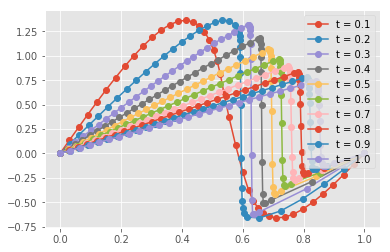

Number of space steps = 41
Space step = 0.025
Time step = 2.5e-05
Number of time steps = 40001
working ...


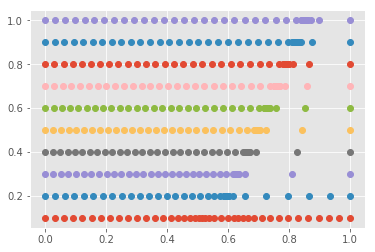

In [181]:
n = 41
eps = 1e-3
sg = 'o-'
tau_coef=1
movingmesh_fd(eps, n, sg, tau_coef, mesh_plot=0)
movingmesh_fd(eps, n, sg, tau_coef, mesh_plot=1)

Number of space steps = 41
Space step = 0.025
Time step = 2.5e-05
Number of time steps = 40001
working ...


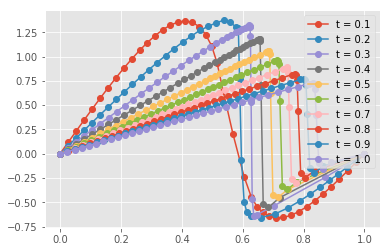

Number of space steps = 41
Space step = 0.025
Time step = 2.5e-05
Number of time steps = 40001
working ...


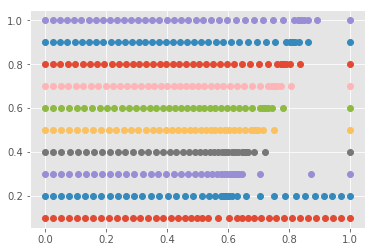

In [183]:
n = 41
eps = 1e-3
sg = 'o-'
tau_coef=10
movingmesh_fd(eps, n, sg, tau_coef, mesh_plot=0)
movingmesh_fd(eps, n, sg, tau_coef, mesh_plot=1)

We can see that when using moving mesh methods we need a smaller number of mesh points. For $\varepsilon = 10^{-3}$ 41 points are already enough. 